In [ ]:
# Question 3

In [315]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [317]:
df= pd.read_csv('greenbuildings.csv')

In [319]:
df

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


In [321]:
df.describe()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
count,7.894000e+03,7894.000000,7.894000e+03,7820.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,...,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000
mean,4.530025e+05,588.615024,2.346377e+05,3.206720,28.418569,82.606371,13.584495,47.243983,0.379529,0.399924,...,0.086775,0.034710,0.526602,1229.354193,3432.042311,4661.396504,31.081312,0.011336,0.030959,27.497285
std,7.434053e+05,399.907509,2.975334e+05,8.162989,15.075483,21.380315,12.287083,32.194393,0.485300,0.489913,...,0.281523,0.183056,0.499323,1104.588925,1976.937255,1984.326881,11.575219,0.002406,0.008534,10.598952
min,1.000000e+00,1.000000,1.624000e+03,-24.950000,2.980000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,39.000000,0.000000,2103.000000,10.460000,0.009487,0.017800,9.000000
25%,1.574520e+05,272.000000,5.089125e+04,1.740000,19.500000,77.850000,4.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,684.000000,1419.000000,2869.000000,22.710000,0.010296,0.023300,20.000000
50%,3.132530e+05,476.000000,1.288380e+05,1.970000,25.160000,89.530000,10.000000,34.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,966.000000,2739.000000,4979.000000,23.160000,0.010296,0.032737,25.145000
75%,4.411885e+05,1044.000000,2.942120e+05,2.380000,34.180000,96.440000,19.000000,79.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1620.000000,4796.000000,6413.000000,43.890000,0.011816,0.037808,34.000000
max,6.208103e+06,1230.000000,3.781045e+06,67.780000,250.000000,100.000000,110.000000,187.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5240.000000,7200.000000,8244.000000,58.020000,0.028914,0.062800,71.440000


In [322]:
# data cleaning 

In [325]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_values


CS_PropertyID         0
cluster               0
size                  0
empl_gr              74
Rent                  0
leasing_rate          0
stories               0
age                   0
renovated             0
class_a               0
class_b               0
LEED                  0
Energystar            0
green_rating          0
net                   0
amenities             0
cd_total_07           0
hd_total07            0
total_dd_07           0
Precipitation         0
Gas_Costs             0
Electricity_Costs     0
cluster_rent          0
dtype: int64

In [326]:
df[df['leasing_rate'] <= 10]

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
19,625220,8,72500,67.78,18.58,0.00,10,57,0,0,...,0,0,0,5240,956,6196,10.46,0.011955,0.023505,25.500
213,1211897,20,108000,NaN,22.00,0.00,3,1,0,0,...,0,0,0,921,5908,6829,58.02,0.013425,0.041120,19.670
229,402791,22,4000,1.97,30.00,0.00,3,99,0,0,...,0,0,0,130,2739,2869,22.71,0.010296,0.037808,33.000
301,329534,32,50160,1.97,16.47,5.10,11,92,1,0,...,0,0,0,130,2739,2869,22.71,0.010296,0.037808,25.500
326,91251,34,71000,4.01,9.60,0.00,10,77,1,0,...,0,0,0,2746,1670,4416,25.55,0.010118,0.028869,20.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,321328,1210,15000,1.97,27.96,0.00,2,101,0,0,...,0,0,0,130,2739,2869,22.71,0.010296,0.037808,35.000
7584,7243,1211,16314,2.10,18.00,1.92,3,19,0,0,...,0,0,0,4607,1113,5720,22.71,0.010296,0.037808,18.000
7667,5015583,1218,10700,2.38,31.80,0.00,2,46,0,0,...,0,0,0,684,1419,2103,22.71,0.010296,0.037808,35.270
7782,129772,1227,4706,0.97,35.00,0.00,3,63,1,0,...,0,0,0,1813,3904,5717,45.73,0.014482,0.032737,43.355


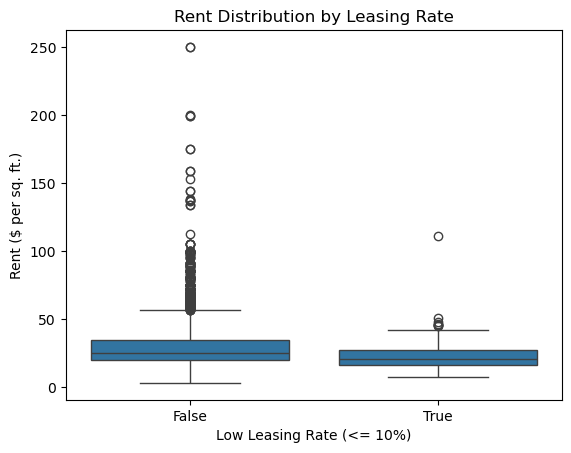

In [329]:
# Creating a new column to identify low leasing rate buildings
df['low_leasing_rate'] = df['leasing_rate'] <= 10

# Boxplot of Rent by leasing rate condition
sns.boxplot(x='low_leasing_rate', y='Rent', data=df)
plt.title('Rent Distribution by Leasing Rate')
plt.xlabel('Low Leasing Rate (<= 10%)')
plt.ylabel('Rent ($ per sq. ft.)')
plt.show()

In [330]:
# The distribution of rents for buildings with low leasing rates (True) appears to have a similar range to those with higher leasing rates (False),
# but with more variability and some notable outliers. 
# This indicates that these buildings may not be entirely different in terms of rent but do show more variability.

In [331]:
# checking the correlation
correlation_matrix = df.corr()
print(correlation_matrix['empl_gr'].sort_values(ascending=False))


empl_gr              1.000000
cd_total_07          0.430737
total_dd_07          0.091604
class_a              0.028179
Energystar           0.014689
low_leasing_rate     0.013915
green_rating         0.011318
Gas_Costs            0.005615
amenities           -0.003848
net                 -0.006065
LEED                -0.011363
class_b             -0.012710
Rent                -0.025646
cluster             -0.031753
cluster_rent        -0.033888
size                -0.035416
leasing_rate        -0.039429
CS_PropertyID       -0.046015
renovated           -0.056001
stories             -0.060875
age                 -0.084447
Electricity_Costs   -0.116926
hd_total07          -0.150075
Precipitation       -0.253328
Name: empl_gr, dtype: float64


In [335]:
# Given that there isn't a strong or significant correlation between the empl_gr column and the other variables,
# I have two options: either delete those 74 rows or impute the missing values with the median value.

In [337]:
df_cleaned = df.dropna(subset=['empl_gr'])

In [339]:
# Removing rows where the leasing rate is less than or equal to 10%
df_cleaned2 = df_cleaned[df_cleaned['leasing_rate'] > 10]


In [341]:
df2=df_cleaned2.copy()

In [343]:
df2

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent,low_leasing_rate
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78,False
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78,False
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78,False
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78,False
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72,False
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72,False
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72,False
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72,False


In [345]:
df2.columns

Index(['CS_PropertyID', 'cluster', 'size', 'empl_gr', 'Rent', 'leasing_rate',
       'stories', 'age', 'renovated', 'class_a', 'class_b', 'LEED',
       'Energystar', 'green_rating', 'net', 'amenities', 'cd_total_07',
       'hd_total07', 'total_dd_07', 'Precipitation', 'Gas_Costs',
       'Electricity_Costs', 'cluster_rent', 'low_leasing_rate'],
      dtype='object')

In [347]:
df2.drop('low_leasing_rate', axis=1, inplace=True)

In [350]:
# Segregate Green and Non-Green Buildings

In [352]:
# The Excel expert's approach has several flaws, as it doesn't consider any other columns in the analysis to determine the rent.
# However, his method of deleting null values and removing buildings with low leasing rates seems reasonable,
# as these buildings do not show any significant difference in the median rent, as observed in the graphs above.

In [ ]:
# This is what is done by thr excel guru and is his analysis.

In [354]:
# Green buildings are those with 'green_rating' == 1

# Segregate green and non-green buildings
green_buildings = df2[df2['green_rating'] == 1]
non_green_buildings = df2[df2['green_rating'] == 0]

# Calculate the median rent for green and non-green buildings
median_rent_green = green_buildings['Rent'].median()
median_rent_non_green = non_green_buildings['Rent'].median()

# Display the median rents
print(f"Median Rent for Green Buildings: ${median_rent_green:.2f} per sq. ft.")
print(f"Median Rent for Non-Green Buildings: ${median_rent_non_green:.2f} per sq. ft.")

# Calculate the rent difference
rent_difference = median_rent_green - median_rent_non_green
print(f"Rent Difference between Green and Non-Green Buildings: ${rent_difference:.2f} per sq. ft.")

# Calculate the potential extra revenue from the green building
building_size = 250000  # in square feet
extra_revenue_per_year = building_size * rent_difference
print(f"Potential Extra Revenue from the Green Building: ${extra_revenue_per_year:,.2f} per year")


Median Rent for Green Buildings: $27.60 per sq. ft.
Median Rent for Non-Green Buildings: $25.06 per sq. ft.
Rent Difference between Green and Non-Green Buildings: $2.54 per sq. ft.
Potential Extra Revenue from the Green Building: $635,000.00 per year


In [ ]:
# now i am including my own analysis and will provide where all excel guru was right and where all it was wrong in the end.

In [356]:
# Data Preprocessing - Converting categorical columns to 'category' dtype
df2['cluster'] = df2['cluster'].astype('category')
df2['renovated'] = df2['renovated'].astype('category')
df2['class_a'] = df2['class_a'].astype('category')
df2['class_b'] = df2['class_b'].astype('category')
df2['LEED'] = df2['LEED'].astype('category')
df2['Energystar'] = df2['Energystar'].astype('category')
df2['green_rating'] = df2['green_rating'].astype('category')
df2['net'] = df2['net'].astype('category')
df2['amenities'] = df2['amenities'].astype('category')

# Linear Regression Model

df2['Rent_diff'] = df2['Rent'] - df2['cluster_rent']
model = smf.ols(formula='Rent_diff ~ green_rating', data=df2).fit()

# Summary of the regression coefficients
print(model.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7766      0.119      6.527      0.000       0.543       1.010
green_rating[T.1]     2.3319      0.399      5.851      0.000       1.551       3.113


In [358]:
#  Interpretation of Coefficients

# ### Intercept: 0.7766
# - **Explanation**: This value indicates the average difference in rent (`Rent_diff`) for buildings that are not green-rated (`green_rating = 0`).
# - **Insight**: On average, buildings without a green rating charge $0.7766 more per square foot per year compared to the local market average rent.

# ### green_rating[T.1]: 2.3319
# - **Explanation**: This coefficient reflects the additional rent difference for buildings that are green-rated (`green_rating = 1`), relative to buildings that are not green-rated.
# - **Insight**: Buildings with a green rating tend to charge, on average, $2.3319 more per square foot per year than those without a green rating.


In [360]:
# Confidence: The confidence interval for the effect of the green rating indicates that the premium is likely to range between $1.55 and $3.11 per square foot per year.
# Economic Impact: The findings suggest that green-rated buildings achieve a rent premium of around $2.33 per square foot per year above the local market average, 
# even after considering the rent differential for non-green buildings.


In [362]:
import statsmodels.api as sm

# Define the confounding variables (excluding 'Rent', 'green_rating', 'LEED', 'Energystar', 'Cluster Rent')
confounding_variables = df2.columns.difference(['Rent', 'green_rating', 'LEED', 'Energystar', 'cluster_rent'])
important = []

# Iterate through each confounding variable
for i, col in enumerate(confounding_variables):
    print(f"{i+1}) Multiple Linear Regression, green-building rating with {col}: ", end="")

    # Define the independent variables including 'green_rating' and the current confounding variable
    X = df2[['green_rating', col]]
    X = sm.add_constant(X)  # Add a constant (intercept) to the model
    
    # Define the dependent variable
    y = df2['Rent'] - df2['cluster_rent']
    
    # Fit the multiple linear regression model
    model = sm.OLS(y, X).fit()
    
    # Extract the p-value for 'green_rating'
    pval = model.pvalues['green_rating']

    # Check if p-value indicates confounding (p-value > 0.05)
    if pval > 0.05:
        print("Confounding")
        important.append(col)
    else:
        print("Non-Confounding")


1) Multiple Linear Regression, green-building rating with CS_PropertyID: Non-Confounding
2) Multiple Linear Regression, green-building rating with Electricity_Costs: Non-Confounding
3) Multiple Linear Regression, green-building rating with Gas_Costs: Non-Confounding
4) Multiple Linear Regression, green-building rating with Precipitation: Non-Confounding
5) Multiple Linear Regression, green-building rating with Rent_diff: Non-Confounding
6) Multiple Linear Regression, green-building rating with age: Non-Confounding
7) Multiple Linear Regression, green-building rating with amenities: Non-Confounding
8) Multiple Linear Regression, green-building rating with cd_total_07: Non-Confounding
9) Multiple Linear Regression, green-building rating with class_a: Confounding
10) Multiple Linear Regression, green-building rating with class_b: Non-Confounding
11) Multiple Linear Regression, green-building rating with cluster: Non-Confounding
12) Multiple Linear Regression, green-building rating with em

In [364]:
# Class_A category is  an underlying confounding variable with the Rent and Green Ratings.

In [366]:
# making new columns for making 2-3 redundant columns into a single column and giving name for the ease of readibility for visualization plots.

In [368]:
# Recode green_rating
df2['green_rating'] = df2['green_rating'].apply(lambda x: "Green" if x in [1, '1', True] else "Non_green")


# Recode class
df2['class'] = df2.apply(lambda row: "Class A" if row['class_a'] == 1 else ("Class B" if row['class_b'] == 1 else "Class C"), axis=1)

# Recode net
df2['net'] = df2['net'].apply(lambda x: "Net" if x in [1, '1', True] else "Non_Net")

# Recode greentype
df2['greentype'] = df2.apply(lambda row: "LEED" if row['LEED'] == 1 else ("Energystar" if row['Energystar'] == 1 else 0), axis=1)


In [370]:
df2['green_rating']

0           Green
1       Non_green
2       Non_green
3       Non_green
4       Non_green
          ...    
7889    Non_green
7890    Non_green
7891    Non_green
7892    Non_green
7893    Non_green
Name: green_rating, Length: 7606, dtype: category
Categories (2, object): ['Non_green', 'Green']

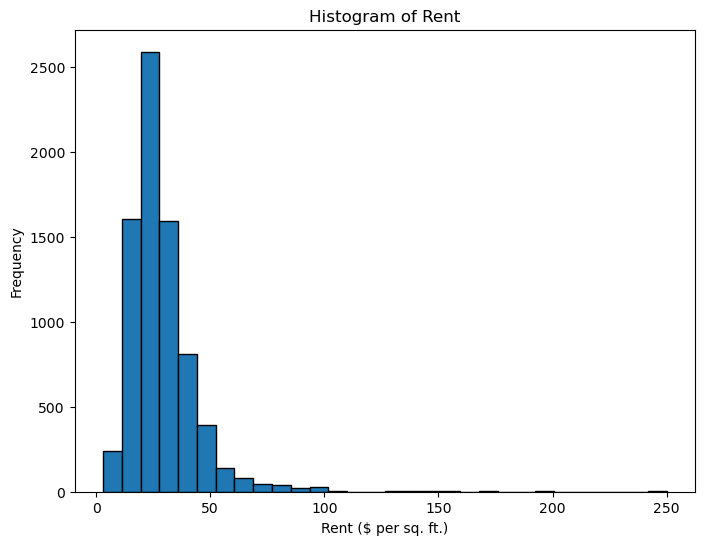

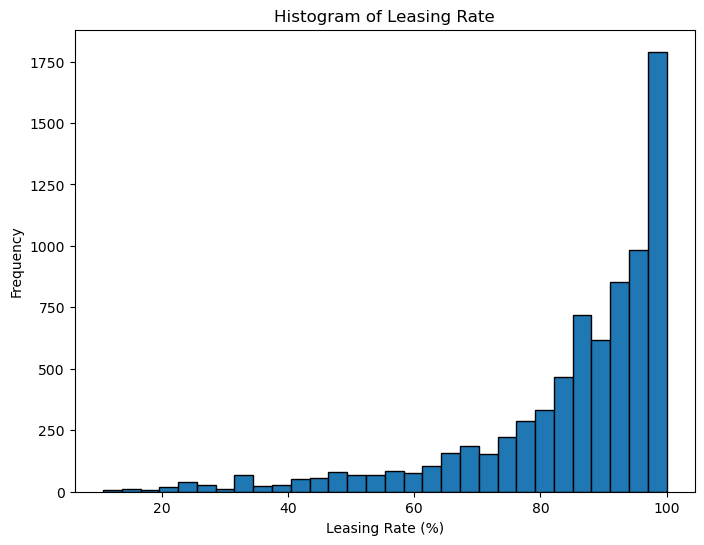

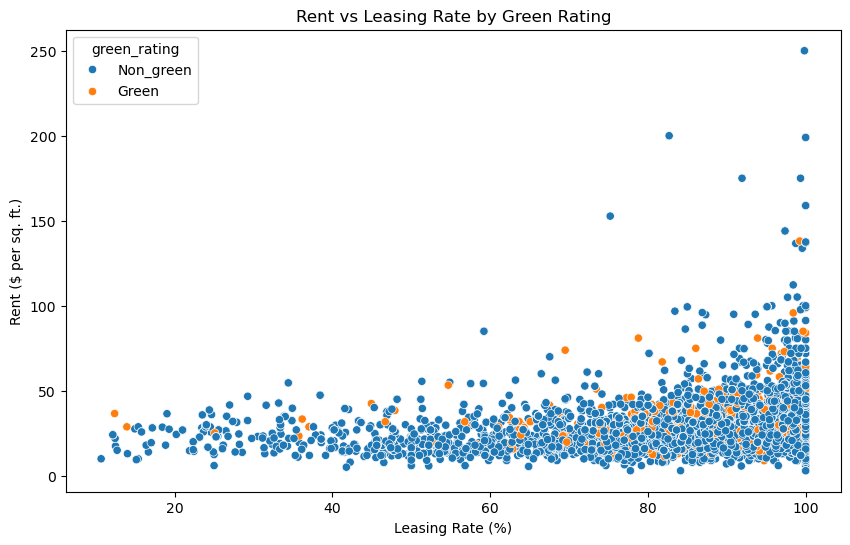

In [380]:

# Histogram for Rent
plt.figure(figsize=(8, 6))
plt.hist(df2['Rent'], bins=30, edgecolor='black')
plt.title('Histogram of Rent')
plt.xlabel('Rent ($ per sq. ft.)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Leasing Rate
plt.figure(figsize=(8, 6))
plt.hist(df2['leasing_rate'], bins=30, edgecolor='black')
plt.title('Histogram of Leasing Rate')
plt.xlabel('Leasing Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='leasing_rate', y='Rent', hue='green_rating', data=df2)
plt.title('Rent vs Leasing Rate by Green Rating')
plt.xlabel('Leasing Rate (%)')
plt.ylabel('Rent ($ per sq. ft.)')
plt.show()


In [ ]:
# making bins for countinuous variables like age, electricity costs and total_dd_07 for visualization purposes.

In [382]:
# Create age categories
df2['agecat'] = pd.cut(df2['age'], bins=[0, 15, 30, 100])

# Create Electricity Costs categories
df2['elecat'] = pd.cut(df2['Electricity_Costs'], bins=[0, 0.01, 0.02, 0.03, 0.05, 0.1])

# Create total_dd_07 categories
df2['td'] = pd.cut(df2['total_dd_07'], bins=[0, 2000, 4000, 6000, 8000])


In [384]:
df2[['net','green_rating','class','greentype','td','agecat','elecat','greentype']]

,net,green_rating,class,greentype,td,agecat,elecat,greentype
0,Non_Net,Green,Class A,Energystar,"(4000, 6000]","(15, 30]","(0.02, 0.03]",Energystar
1,Non_Net,Non_green,Class B,0,"(4000, 6000]","(15, 30]","(0.02, 0.03]",0
2,Non_Net,Non_green,Class B,0,"(4000, 6000]","(30, 100]","(0.02, 0.03]",0
3,Non_Net,Non_green,Class B,0,"(4000, 6000]","(30, 100]","(0.02, 0.03]",0
4,Non_Net,Non_green,Class A,0,"(4000, 6000]","(0, 15]","(0.02, 0.03]",0
...,...,...,...,...,...,...,...,...
7889,Non_Net,Non_green,Class A,0,"(6000, 8000]","(30, 100]","(0.03, 0.05]",0
7890,Non_Net,Non_green,Class C,0,"(6000, 8000]","(30, 100]","(0.03, 0.05]",0
7891,Non_Net,Non_green,Class C,0,"(6000, 8000]","(30, 100]","(0.03, 0.05]",0
7892,Non_Net,Non_green,Class B,0,"(6000, 8000]","(30, 100]","(0.03, 0.05]",0


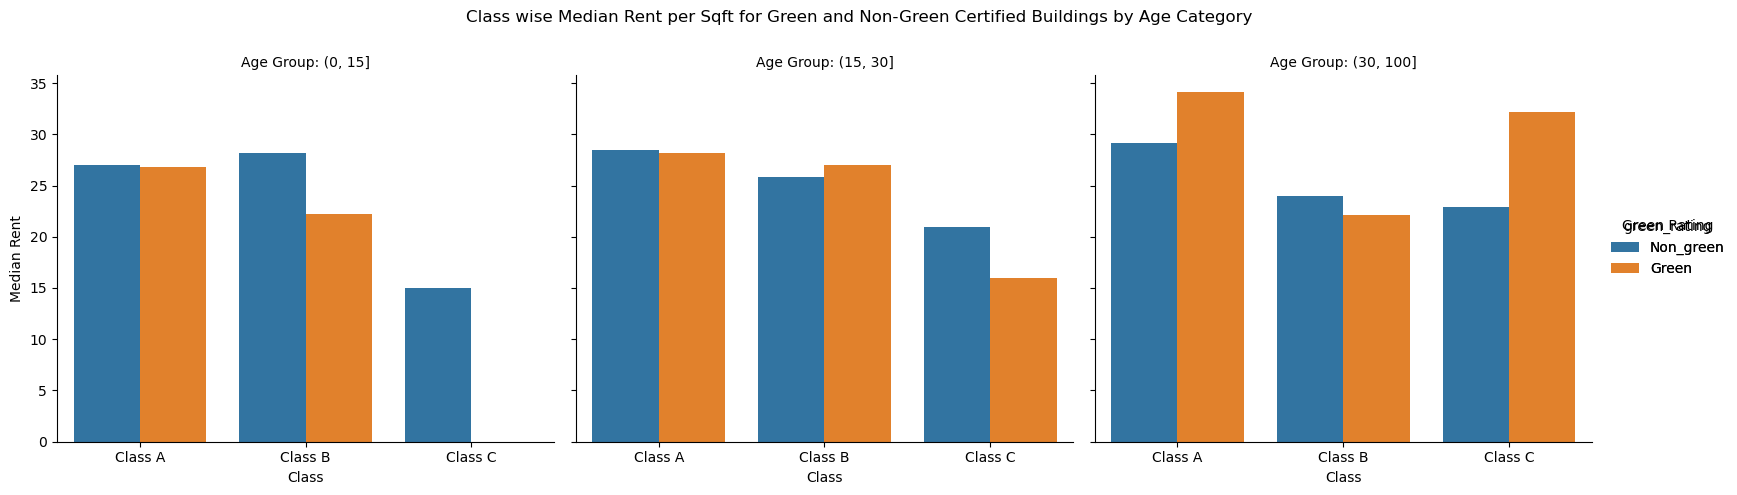

In [295]:

# Group by 'class', 'green_rating', and 'agecat', then calculate the median rent and count
df5 = df2.groupby(['class', 'green_rating', 'agecat'], observed=False).agg(
    medianrent=('Rent', 'median'),
    countof=('green_rating', 'count')
).reset_index()

# Plot: Median Rent by Class, Green Certification, and Age Category
g = sns.catplot(
    x='class', y='medianrent', hue='green_rating', col='agecat',
    data=df5, kind='bar', height=5, aspect=1
)

g.set_titles("Age Group: {col_name}")
g.set_axis_labels("Class", "Median Rent")
g.add_legend(title="Green Rating")

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Class wise Median Rent per Sqft for Green and Non-Green Certified Buildings by Age Category')

plt.show()

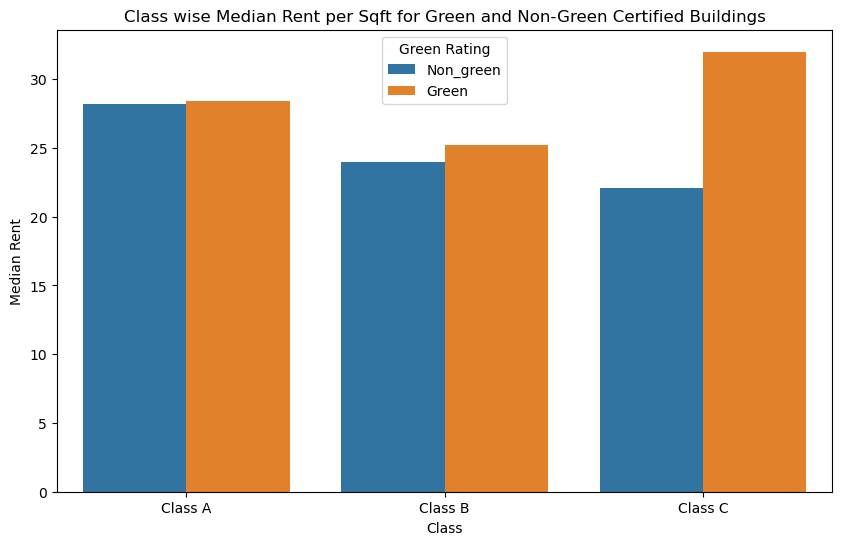

In [297]:
# Group by 'class' and 'green_rating', then calculate the median rent and count
df4 = df2.groupby(['class', 'green_rating'], observed=False).agg(
    medianrent=('Rent', 'median'),
    countof=('green_rating', 'count')
).reset_index()

# Plot: Class wise Median Rent per Sqft for Green and Non-Green Certified Buildings
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='medianrent', hue='green_rating', data=df4)
plt.title('Class wise Median Rent per Sqft for Green and Non-Green Certified Buildings')
plt.ylabel('Median Rent')
plt.xlabel('Class')
plt.legend(title='Green Rating')
plt.show()

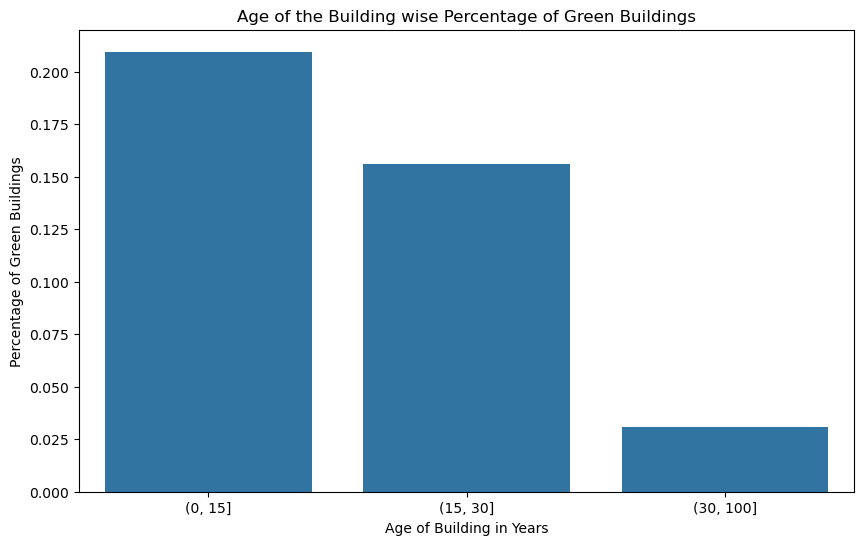

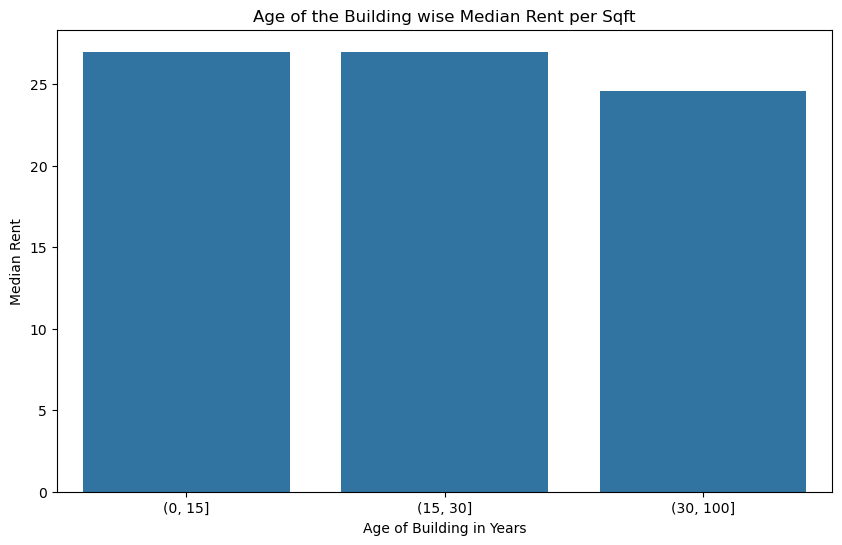

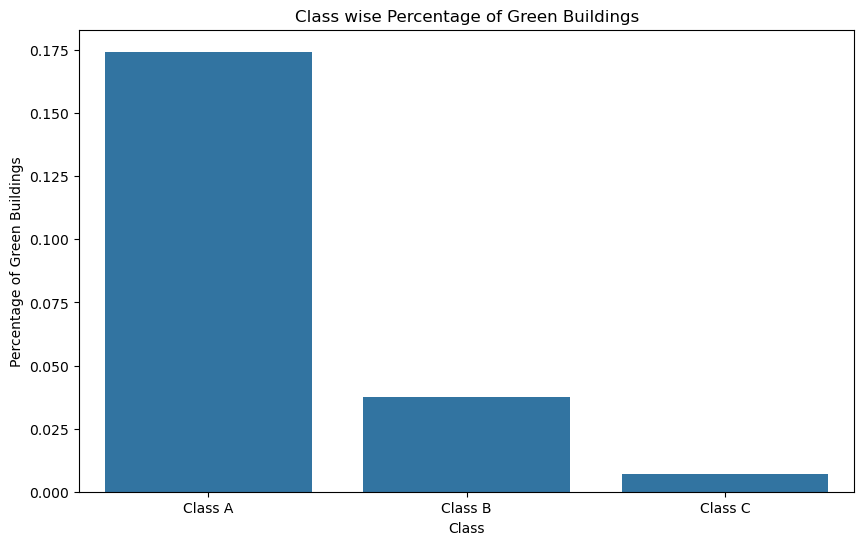

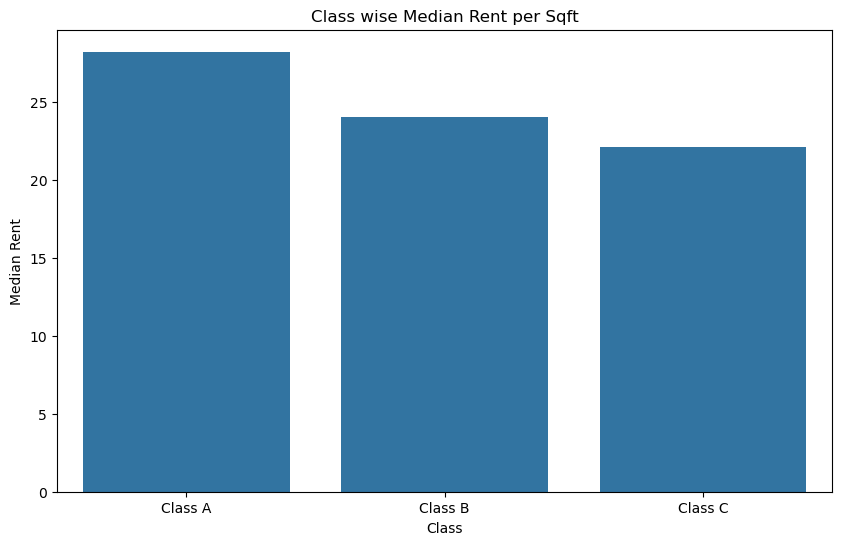

In [299]:
# Group by 'agecat' and calculate median rent, percentage of green buildings, and count
df3 = df2.groupby('agecat', observed=False).agg(
    medianrent=('Rent', 'median'),
    percentage=('green_rating', lambda x: (x == 'Green').sum() / len(x)),
    countof=('green_rating', 'count')
).reset_index()

# Plot: Age of the Building wise Percentage of Green Buildings
plt.figure(figsize=(10, 6))
sns.barplot(x='agecat', y='percentage', data=df3)
plt.title('Age of the Building wise Percentage of Green Buildings')
plt.ylabel('Percentage of Green Buildings')
plt.xlabel('Age of Building in Years')
plt.show()

# Plot: Age of the Building wise Median Rent per Sqft
plt.figure(figsize=(10, 6))
sns.barplot(x='agecat', y='medianrent', data=df3)
plt.title('Age of the Building wise Median Rent per Sqft')
plt.ylabel('Median Rent')
plt.xlabel('Age of Building in Years')
plt.show()

# Group by 'class' and calculate median rent, percentage of green buildings, and count
df4 = df2.groupby('class', observed=False).agg(
    meanrent=('Rent', 'median'),
    percentage=('green_rating', lambda x: (x == 'Green').sum() / len(x)),
    countof=('green_rating', 'count')
).reset_index()

# Plot: Class wise Percentage of Green Buildings
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='percentage', data=df4)
plt.title('Class wise Percentage of Green Buildings')
plt.ylabel('Percentage of Green Buildings')
plt.xlabel('Class')
plt.show()

# Plot: Class wise Median Rent per Sqft
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='meanrent', data=df4)
plt.title('Class wise Median Rent per Sqft')
plt.ylabel('Median Rent')
plt.xlabel('Class')
plt.show()

In [ ]:
# From the graphs it can be concluded that there is no considerable increase in Median rent for
# the non-green building to green building for Classes A and B across all age groups. 

In [78]:
# net means they pay their own rent of utilities.

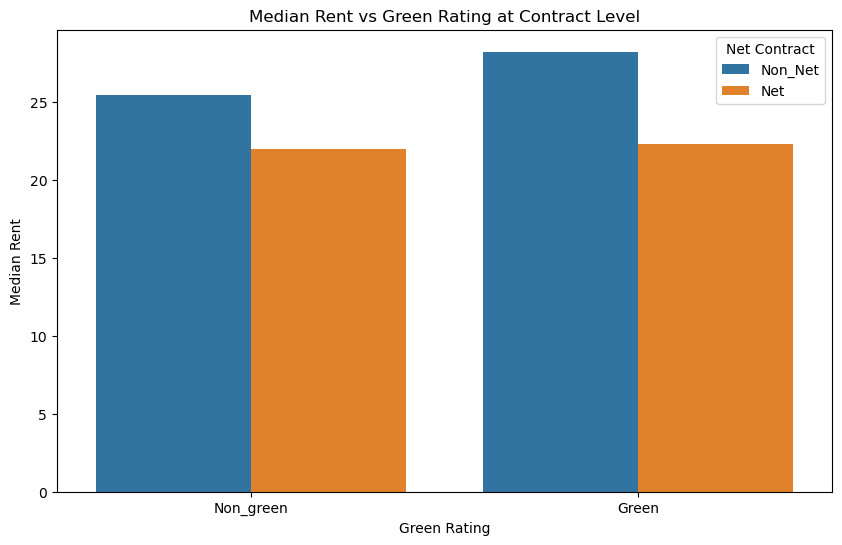

In [80]:
# Group by 'green_rating' and 'net' and calculate median rent and count of units
df3net = df2.groupby(['green_rating', 'net'], observed=False).agg(
    medianrent=('Rent', 'median'),
    countof=('Rent', 'size')
).reset_index()

# Plot: Median Rent vs Green Rating at Contract Level
plt.figure(figsize=(10, 6))
sns.barplot(x='green_rating', y='medianrent', hue='net', data=df3net, dodge=True)
plt.title('Median Rent vs Green Rating at Contract Level')
plt.ylabel('Median Rent')
plt.xlabel('Green Rating')
plt.legend(title='Net Contract')
plt.show()

In [ ]:
# In the case of tenants availing net-rental contracts,they end up paying the same median rent for both green and non-green building.
# The underlying assumption that green buildings should have lesser difference between net rental contacts and non net rental contracts,
# being that green building reduce the consumption power accounting to thier ecofriendly design,was not observed.
# Rather this difference was more significant in the case of green buildings.


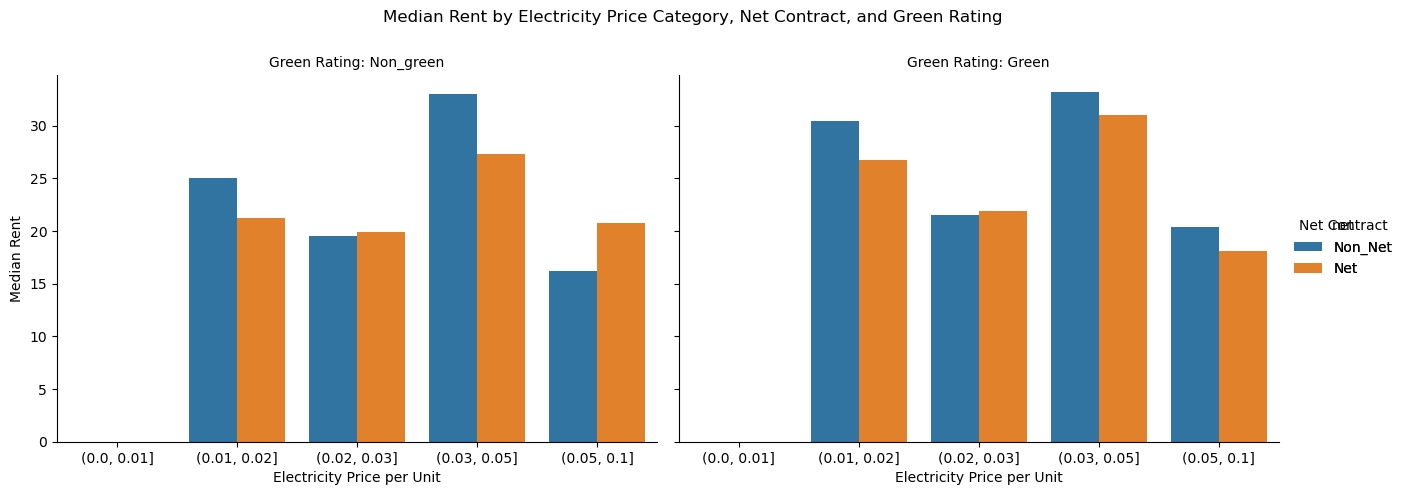

In [85]:

# Group by 'green_rating', 'net', and 'elecat', and calculate median rent and count of units
df3netele = df2.groupby(['green_rating', 'net', 'elecat'], observed=False).agg(
    medianrent=('Rent', 'median'),
    countof=('Rent', 'size')
).reset_index()

# Plot: Median Rent at Electricity Price Category Level by Green Rating and Net Contract
g = sns.catplot(
    x='elecat', y='medianrent', hue='net', col='green_rating',
    data=df3netele, kind='bar', height=5, aspect=1.2, dodge=True
)

g.set_titles("Green Rating: {col_name}")
g.set_axis_labels("Electricity Price per Unit", "Median Rent")
g.add_legend(title="Net Contract")

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Median Rent by Electricity Price Category, Net Contract, and Green Rating')

plt.show()

In [ ]:
# Objective: The goal was to compare Net Contracts with Non-Net Contracts to identify any correlation between electricity charges 
# and the difference in rent between these two contract types.
# Finding: The rent difference between Net and Non-Net Contracts is higher for Non-Green buildings, particularly in the electricity charge bracket of $0.03 to $0.05 per square foot.

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


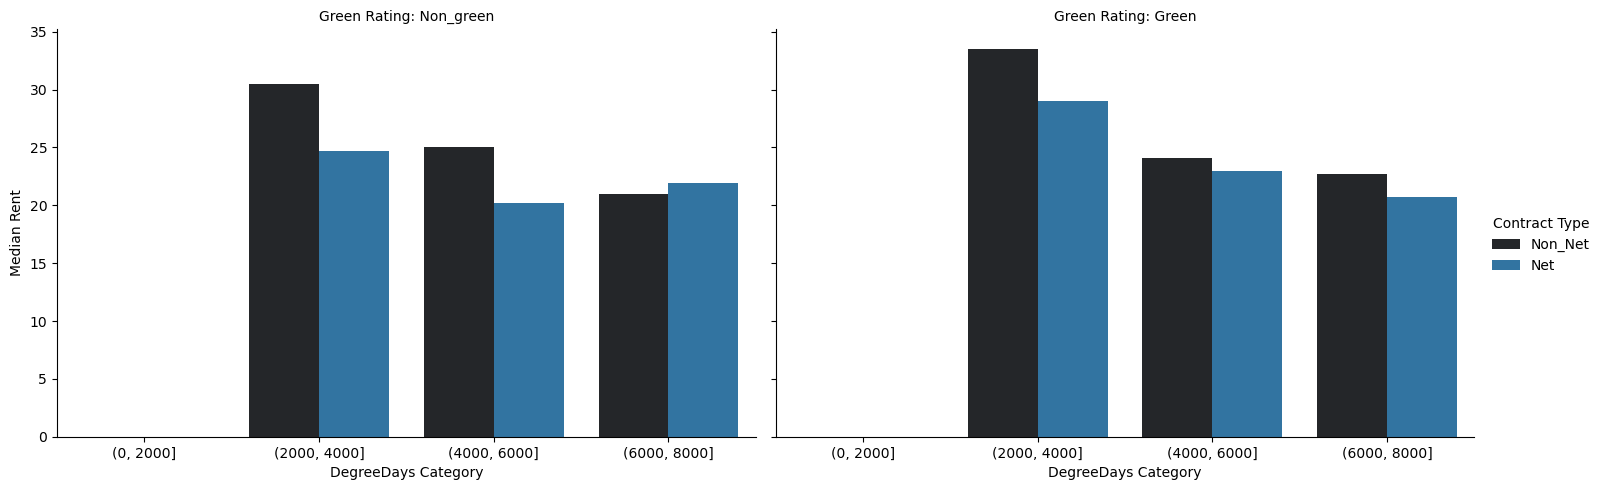

In [91]:
# Group by 'green_rating', 'net', and 'td', and calculate median rent and count of units
df3nettd = df2.groupby(['green_rating', 'net', 'td'], observed=False).agg(
    meanrent=('Rent', 'median'),
    countof=('Rent', 'size')
).reset_index()

# Plot: Degree Days Category Wise Median Rent Across Contract Type
g = sns.FacetGrid(df3nettd, col='green_rating', height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='td', y='meanrent', hue='net', dodge=True)
g.add_legend(title='Contract Type')
g.set_axis_labels('DegreeDays Category', 'Median Rent')
g.set_titles(col_template='Green Rating: {col_name}')
plt.show()

In [ ]:
# With the help of graphs above, we can conclude that the difference betweeen net and non net contracts is higher for Non green buildings.
# This further emphasizes that the green rated building need less maintenance and tenants end up spending minimal amount for the services.


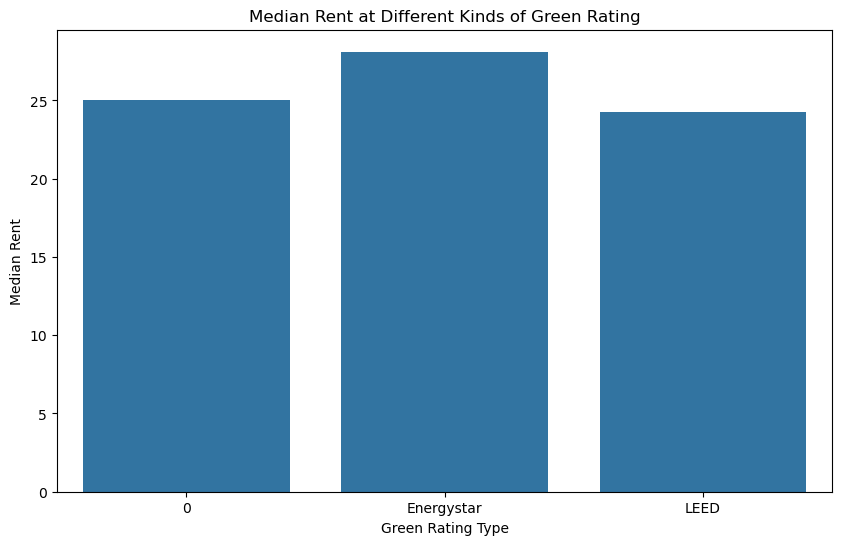

In [96]:
# Group by 'greentype' and calculate median rent and count of units
greentype = df2.groupby('greentype', observed=False).agg(
    meanrent=('Rent', 'median'),
    countof=('Rent', 'size')
).reset_index()

# Plot: Median Rent at Different Kinds of Green Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='greentype', y='meanrent', data=greentype)
plt.title("Median Rent at Different Kinds of Green Rating")
plt.ylabel("Median Rent")
plt.xlabel("Green Rating Type")
plt.show()

In [ ]:
# energystar rated green type buildings have the highest median rent.

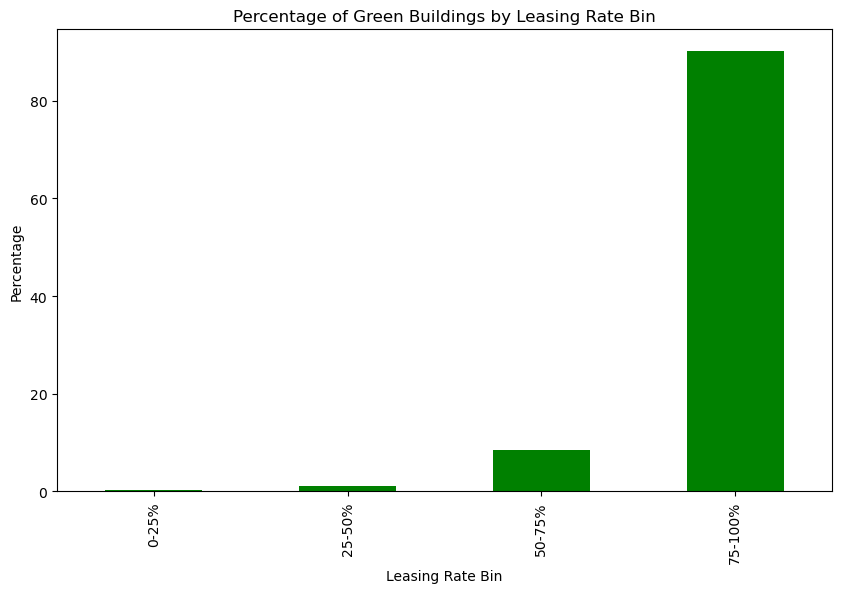

In [107]:

# Define the bins and labels for leasing_rate
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']

# Create a new column with binned leasing_rate
df2['leasing_rate_bin'] = pd.cut(df2['leasing_rate'], bins=bins, labels=labels, right=True)

# Filter the DataFrame to only include green buildings
green_df = df2[df2['green_rating'] == 'Green']

# Calculate the count of green buildings in each leasing_rate_bin
green_count = green_df['leasing_rate_bin'].value_counts().sort_index()

# Calculate the percentage of green buildings in each bin relative to the total number of green buildings
green_percentage = (green_count / green_count.sum()) * 100

# Plotting the percentage
plt.figure(figsize=(10, 6))
green_percentage.plot(kind='bar', color='green')
plt.title('Percentage of Green Buildings by Leasing Rate Bin')
plt.ylabel('Percentage')
plt.xlabel('Leasing Rate Bin')
plt.show()

In [390]:
# most of the green rate buildings leasing rate lies in 50-100 percent among that more than 80 percent lies in the 75-100 percent brackett.

In [396]:
# Group by 'green_rating' and 'renovated' and count the occurrences
grouped_df = df2.groupby(['green_rating', 'renovated'], observed=True).size().reset_index(name='Count')

# Pivot the dataframe to spread 'renovated' values into separate columns
pivot_df = grouped_df.pivot(index='green_rating', columns='renovated', values='Count').fillna(0)

# Calculate the percentage of renovated buildings
pivot_df['percentRenovated'] = (pivot_df.get(1, 0) * 100) / (pivot_df.get(1, 0) + pivot_df.get(0, 0))

# Reset the index to make 'green_rating' a column again
pivot_df = pivot_df.reset_index()


print(pivot_df)

renovated green_rating     0     1  percentRenovated
0            Non_green  4178  2750         39.693995
1                Green   533   145         21.386431


In [398]:
# only around 21 percent of the green buildings are being renovated as compared to almost
# 40 percent of non green buildings this suggests that there would be lower costs for maintenance of green buildings, conserving costs in future.

In [400]:
## Conclusion
# Just constructing a green building might not be sufficient for it to be profitable. We need to consider several other factors to make this plan profitable.Those points are as follow:
# 1. Building should be energystar certified.
# 2. It should be rented out as Non net contract.
# 3. Tenant should be charged for utilities at the market rates.
# This ensures that company could make money on the utilities charge and compensate for the initial investment in the coming years as the electricity and gas prices tend to hike.
 

In [ ]:
#  Although the Excel or stats expert made some correct assumptions, such as removing properties with lower leasing rates and cleaning out rows with null values,
# simply comparing the median rent between green and non-green buildings is insufficient.
# He needs to consider various other factors, 
# including the conditions under which a real estate developer should construct a building to ensure that the investment
# is profitable and the return on investment is achieved quickly.